In [17]:
!pwd

/c/Users/mdoumbia/OneDrive - Howard University/Desktop


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline


In [2]:
names_dir = r'C:/Users/mdoumbia/OneDrive - Howard University/Desktop/namesbystate/'
names_list_data = []
names_columns = ['state','gender', 'year', 'name', 'babies']
for file in os.listdir(names_dir):
    if file.endswith('.TXT'):
        names_data = pd.read_csv(names_dir +'\\'+ file, header=None,names=names_columns)
        names_list_data.append(names_data)
    else:
        continue
names_data = pd.concat(names_list_data)


In [3]:
data = names_data[names_data['year']>=1950]
data.shape

(4803114, 5)

In [4]:
data.groupby('gender')['babies'].sum()/data['babies'].sum()

gender
F    0.47002
M    0.52998
Name: babies, dtype: float64

In [5]:
total_babies = data['babies'].sum()
female_percent = data[data['gender']=='F'].babies.sum()/data['babies'].sum()
male_percent = data[data['gender']=='M'].babies.sum()/data['babies'].sum()

In [6]:
female_percent

0.47001978302418573

In [7]:
most_popular_names = (
 data.groupby(['name','gender'])
    .babies
    .sum()
    .reset_index()
    .sort_values('babies', ascending=False)

)

In [8]:
#most_popular_names.head(20)

In [9]:
unique_names_per_gender = (
data
    .groupby(['year','gender'])
    .name
    .nunique()
     .unstack()
)

In [10]:
unique_names_per_gender.tail()

gender,F,M
year,,
2016,5542,4338
2017,5419,4312
2018,5378,4298
2019,5291,4265
2020,5150,4125


<AxesSubplot:xlabel='year'>

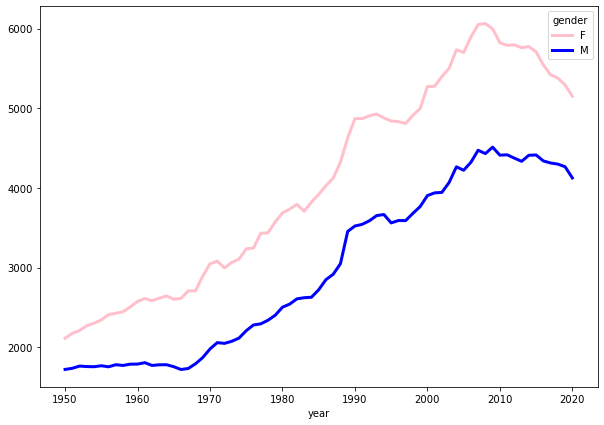

In [11]:
unique_names_per_gender.plot(figsize=(10,7), lw=3, color=['pink', 'blue'])

In [14]:
sns.color_palette('Set1', 20)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

In [15]:
pink=sns.color_palette('Set1', 20)[7]

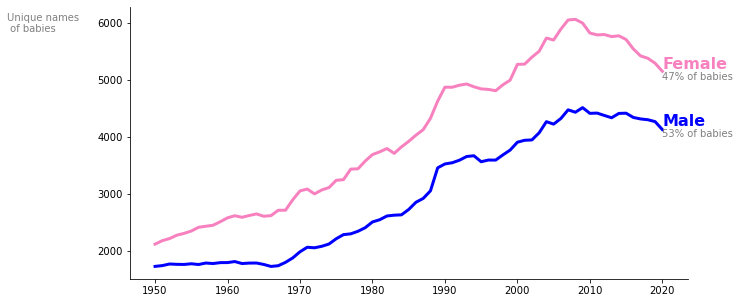

In [33]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=[pink, 'blue'])
sns.despine()
plt.xlabel('')
plt.ylabel('Unique names \n of babies',
           rotation=0,
           position=(-.1,0.9),
           ha ='left',
           labelpad = 90,
           color='gray'
          )
plt.text(2020,5200,'Female',color=pink,
         fontsize=16,
         fontweight='bold'
        )
plt.text(2020,5000,f'{female_percent*100:.0f}% of babies', color='gray')
plt.text(2020,4200,'Male',color='blue',
         fontsize=16,
         fontweight='bold'
        )
plt.text(2020,4000,f'{male_percent*100:.0f}% of babies', color='gray')
plt.legend([], frameon=False)

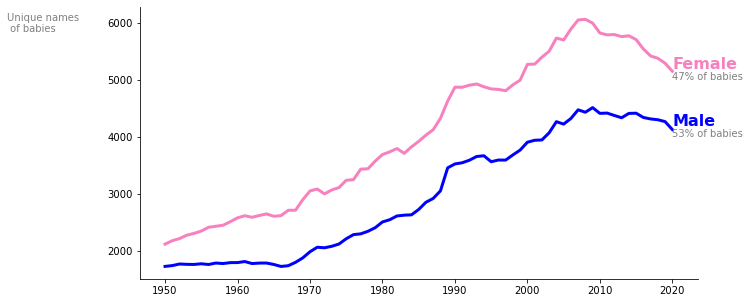

In [24]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=[pink, 'blue'])
sns.despine()
plt.xlabel('')
plt.ylabel('Unique names \n of babies',
           rotation=0,
           position=(-.1,0.9),
           ha ='left',
           labelpad = 100,
           color='gray'
          )
plt.text(2020,5200,'Female',color=pink,
         fontsize=16,
         fontweight='bold'
        )
plt.text(2020,5000,f'{female_percent*100:.0f}% of babies', color='gray')
plt.text(2020,4200,'Male',color='blue',
         fontsize=16,
         fontweight='bold'
        )
plt.text(2020,4000,f'{male_percent*100:.0f}% of babies', color='gray')
plt.legend([], frameon=False)